In [1]:
import json
import pandas as pd
import glob
import pickle
import numpy as np
import os
import re
import matplotlib.pyplot as plt

In [3]:
%matplotlib notebook

In [95]:
read_files = glob.glob("pso_results*.json")

In [96]:
read_files

['pso_results_0_59.json',
 'pso_results_120_179.json',
 'pso_results_180_240.json',
 'pso_results_60_119.json']

In [97]:
read_files = ['pso_results_0_59.json',
              'pso_results_60_119.json',
              'pso_results_120_179.json',
              'pso_results_180_240.json']


In [98]:
pso_global = []
for file in read_files:
    pso_global.extend(json.load(open(file,'r')))

In [99]:
bee = json.load(open('bc_results.json','r'))

In [100]:
df_pso = pd.DataFrame(pso_global).sort_values('champ_f')
df_bee = pd.DataFrame(bee).sort_values('champ_f')

In [101]:
df_pso

,algo,champ_f,eta1,eta2,gen,ind_num,max_vel,memory,neighb_param,neighb_type,omega,seed,time,variant
76,pso,-0.6809,2.05,2.05,200,15,0.5,True,5,1,0.7298,5679,1109.522766,5
196,pso,-0.6809,2.05,2.05,200,15,0.5,False,5,1,0.7298,5679,1084.632370,5
83,pso,-0.6715,2.05,2.05,200,15,0.5,True,5,2,0.7298,5679,1139.996809,6
203,pso,-0.6715,2.05,2.05,200,15,0.5,False,5,2,0.7298,5679,1113.571984,6
227,pso,-0.6425,2.05,2.05,200,15,0.5,False,6,2,0.7298,5679,1148.124795,6
107,pso,-0.6425,2.05,2.05,200,15,0.5,True,6,2,0.7298,5679,1177.661832,6
233,pso,-0.6400,2.05,2.05,200,15,0.5,False,6,3,0.7298,5679,1114.137556,6
113,pso,-0.6400,2.05,2.05,200,15,0.5,True,6,3,0.7298,5679,1141.612298,6
17,pso,-0.6316,2.05,2.05,200,15,0.5,True,2,3,0.7298,5679,1157.221893,6
137,pso,-0.6316,2.05,2.05,200,15,0.5,False,2,3,0.7298,5679,1118.609367,6


In [102]:
df_bee

,algo,champ_f,gen,ind_num,limit,seed,time
2,bee_colony,-0.1939,100,50,3,5679,3275.967076
1,bee_colony,-0.1856,100,50,2,5679,3277.785052
0,bee_colony,-0.1737,100,50,1,5679,3283.427910


In [103]:
writer = pd.ExcelWriter('results.xlsx')
df_pso.to_excel(writer,'PSO')
df_bee.to_excel(writer, 'Bee Colony')
writer.save()

In [4]:
with open('C:/Users/SHTAB-PC-03/Projects/TestGen/GenBoost/MNIST-test/logs/pso_best.bin','rb') as fp:
    dyn = np.array(pickle.load(fp))

In [5]:
dyn

array([[ 1.00000000e+00,  1.50000000e+01, -1.50800000e-01,
         2.38740413e-01, -1.17813333e-01,  2.10654158e+02],
       [ 2.00000000e+00,  3.00000000e+01, -1.72500000e-01,
         1.58113939e-01, -1.35920000e-01,  1.85199387e+02],
       [ 3.00000000e+00,  4.50000000e+01, -1.74200000e-01,
         1.98850982e-01, -1.45960000e-01,  1.70506488e+02],
       ...,
       [ 4.98000000e+02,  7.47000000e+03, -6.12800000e-01,
         1.50605360e-03, -6.12186667e-01,  7.38000496e+00],
       [ 4.99000000e+02,  7.48500000e+03, -6.12800000e-01,
         1.32541124e-03, -6.12240000e-01,  6.47085863e+00],
       [ 5.00000000e+02,  7.50000000e+03, -6.13100000e-01,
         1.27543273e-03, -6.12286667e-01,  6.41289801e+00]])

<IPython.core.display.Javascript object>


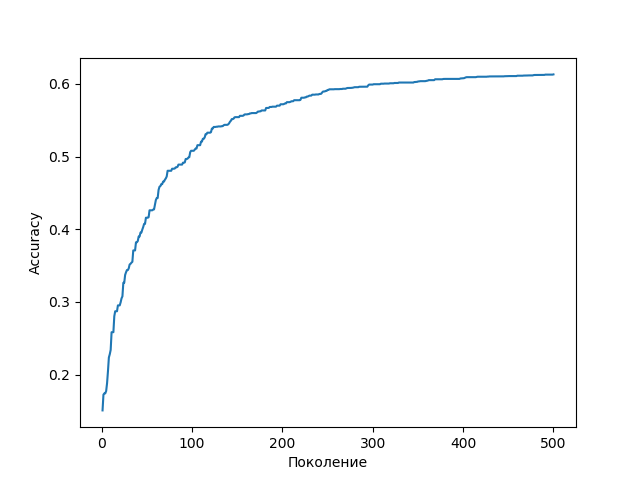

Text(0, 0.5, 'Accuracy')

In [8]:
plt.plot(dyn[:,0],-1*dyn[:,2])
plt.xlabel('Поколение')
plt.ylabel('Accuracy')